<a href="https://colab.research.google.com/github/tobyloby12/NLP_Bundesreden/blob/main/NLP_project_project_visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import os

path = 'gdrive/MyDrive'
path = os.path.join(path, 'PD NLP project')
os.chdir(path)

In [ ]:
import pandas as pd

df_pd = pd.read_excel('PD-Projektdatenbank.xlsx')
df_pd = df_pd[['Titel', 'Projektbeschreibung', 'PD-Bereich(e)']]
#df_pd = df_pd.rename(columns={'PD-Bereich(e)': 'PD_Bereiche'})
df_pd = df_pd.dropna()

In [ ]:
PD_Bereiche = df_pd['PD-Bereich(e)'].unique()

In [ ]:
mapping = {}
for i in range(len(PD_Bereiche)):
  mapping[str(PD_Bereiche[i])] = i

In [ ]:
df_pd = df_pd.replace(mapping)

In [ ]:
!pip install spacy
!python -m spacy download de_core_news_sm
!python -m spacy download bert-base-german-cased
!pip install sentence_transformers
!pip install https://huggingface.co/spacy/de_core_news_sm/resolve/main/de_core_news_sm-any-py3-none-any.whl

     |████████████████████████████████| 14.9 MB 4.3 MB/s 
  Created wheel for de-core-news-sm: filename=de_core_news_sm-2.2.5-py3-none-any.whl size=14907055 sha256=a923a8da6b97f07dd5b15e1a65a98f1678cc92d505666a0bf51732708561e621
  Stored in directory: /tmp/pip-ephem-wheel-cache-4zq13a4x/wheels/00/66/69/cb6c921610087d2cab339062345098e30a5ceb665360e7b32a
Successfully built de-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('de_core_news_sm')

✘ No compatible model found for 'bert-base-german-cased' (spaCy
v2.2.4).

     |████████████████████████████████| 85 kB 2.2 MB/s 
     |████████████████████████████████| 2.6 MB 13.8 MB/s 
     |████████████████████████████████| 1.2 MB 34.4 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 3.3 MB 16.1 MB/s 
     |████████████████████████████████| 895 kB 55.1 MB/s 
     |████████████████████████████████| 636 kB 46.9 MB/s 
  Created wheel for sentence-tran

In [ ]:
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

import spacy
nlp = spacy.load("de_core_news_sm")

nltk.download('stopwords')
stop_words = stopwords.words("german")

model = SentenceTransformer('msmarco-distilbert-multilingual-en-de-v2-tmp-trained-scratch')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/603 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
df_pd = df_pd.dropna()
df_pd['Embeddings'] = ''

for i, row in df_pd.iterrows():
  #print(row['Projektbeschreibung'])
  #print(df_pd['Embeddings'][i])
  row_embedding = model.encode([row['Projektbeschreibung']])
  df_pd['Embeddings'][i] = row_embedding

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(df_pd.head())

                                               Titel  ...                                         Embeddings
0                                 BMI - Polizei 2020  ...  [[0.11383691, 0.20208873, -0.120976664, 0.1969...
1                                         BMI - PIAV  ...  [[0.18564224, 0.588622, 0.043419268, -0.405263...
3                           BMI - DLZ-Eckpunkte Bund  ...  [[-0.10252166, 0.28119528, -0.056848157, -0.50...
6  Königsbach-Stein - IBA: Bedarfsanalyse und koo...  ...  [[0.0026514374, 0.45368788, 0.24241474, 0.0189...
7    ITZBund - Begleitung der IT-Konsolidierung Bund  ...  [[-0.3171474, -0.25123826, -0.16925354, -0.140...

[5 rows x 4 columns]


In [ ]:
!pip install sklearn

In [ ]:
import numpy as np

word_embeddings = []
for i, row in df_pd.iterrows():
  word_embeddings.append(row['Embeddings'][0])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(word_embeddings)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca = pca.transform(word_embeddings)

In [ ]:
x_pca.shape

(423, 3)

No handles with labels found to put in legend.


{'Strategische Verwaltungsmodernisierung': 0, 'Bundesbau': 1, 'Bau Länder & Gesundheitswesen': 2, 'Bau Kommunen': 3, 'Bau Kommunen;#Bau Länder & Gesundheitswesen;#Bundesbau': 4, 'Bau Kommunen;#Bau Länder & Gesundheitswesen;#Bundesbau;#Strategische Verwaltungsmodernisierung': 5, 'Bau Kommunen;#Strategische Verwaltungsmodernisierung': 6}


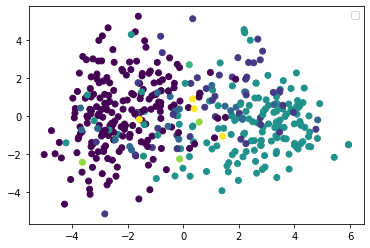

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_pca[:,0], x_pca[:,1], c = df_pd['PD-Bereich(e)'])
plt.legend()
print(mapping)

In [ ]:
import plotly.express as px

In [ ]:
import plotly.express as px

px.scatter_3d(x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2], color=df_pd['PD-Bereich(e)'], hover_name=df_pd['Titel'], title='Showing where projects are located in 3D space')

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne.fit(word_embeddings)
x_tsne = tsne.fit_transform(word_embeddings)

In [ ]:
px.scatter_3d(x=x_tsne[:,0],y=x_tsne[:,1],z=x_tsne[:,2], color=df_pd['PD-Bereich(e)'])

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=3)
mds.fit(word_embeddings)
x_mds = mds.fit_transform(word_embeddings)

In [ ]:
px.scatter_3d(x=x_mds[:,0],y=x_mds[:,1],z=x_mds[:,2], color=df_pd['PD-Bereich(e)'])

In [ ]:
df_departments = pd.read_excel('pd departments and descriptions.xlsx')

In [ ]:
df_departments = df_departments.dropna()

In [ ]:
department_embeddings = []
for entry in df_departments['Description']:
  encoded = model.encode(entry)
  department_embeddings.append(encoded)

In [ ]:
y_pca = pca.transform(department_embeddings)

In [ ]:

fig = px.scatter_3d(x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2], color=df_pd['PD-Bereich(e)'], hover_name=df_pd['Titel'], title='Showing where projects are located in 3D space')

fig.add_trace(px.scatter_3d(x=y_pca[:,0], y=y_pca[:,1], z=y_pca[:,2], hover_name=df_departments['Department'], title='Showing where departments are located in 3D space'))

fig.show()